In [10]:
import pandas as pd

### Stations

In [11]:
stations_path = '../data/2024_stations'
year = 2024
month = 7
if month < 10:
    month = '0' + str(month)

day = 12

if day < 10:
    day = '0' + str(day)

station_file = f'{stations_path}/{year}/{month}/{year}-{month}-{day}-stations.csv'

df_stations = pd.read_csv(station_file)

df_stations.head()

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
0,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.180700,11.460900,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio..."
1,44e2bdb7-13e3-4156-8576-8326cdd20459,bft Tankstelle,NaN,Schellengasse,53,36304,Alsfeld,50.752009,9.279039,1970-01-01 01:00:00+01,{}
2,ad812258-94e7-473d-aa80-d392f7532218,bft Bonn-Bad Godesberg,bft,Godesberger Allee,55,53175,Bonn,50.695100,7.142760,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":31,""period..."
3,51d4b509-a095-1aa0-e100-80009459e03a,JET BONN ROCHUSSTR. 337,JET,ROCHUSSTR.,337,53123,BONN,50.714210,7.039400,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":63,""period..."
4,51d4b516-a095-1aa0-e100-80009459e03a,Supermarkt-Tankstelle WORMS AM RHEIN 29,Supermarkt-Tankstelle,AM RHEIN,29,67547,WORMS,49.637180,8.372440,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period..."


In [12]:
df_stations[df_stations.city == 'Gensingen']

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
11669,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,Globus Handelshof GmbH & Co. KG Betriebsstätte...,Globus SB Warenhaus,Am Kieselberg,36,55457,Gensingen,49.900784,7.922154,2014-03-18 16:45:31+01,{}
12919,38e61a6e-83c2-4c9b-94fe-794db37db591,Globus Handelshof GmbH & Co. KG Betriebsstätte...,Globus SB Warenhaus,Am Kieselberg,36,55457,Gensingen,49.900784,7.922154,2014-03-18 16:45:31+01,{}


In [13]:
df_stations[df_stations.uuid == '28d2efc8-a5e6-47d6-9d37-230fbcefcf70']

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
11669,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,Globus Handelshof GmbH & Co. KG Betriebsstätte...,Globus SB Warenhaus,Am Kieselberg,36,55457,Gensingen,49.900784,7.922154,2014-03-18 16:45:31+01,{}


### Prices

In [14]:
prices_path = '../data/2024_prices'
year = 2024
month = 7
if month < 10:
    month = '0' + str(month)

day = 12

if day < 10:
    day = '0' + str(day)

file = '2024-07-12-prices.csv'

file = f'{prices_path }/{year}/{month}/{year}-{month}-{day}-prices.csv'

df = pd.read_csv(file)

df.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2024-07-12 00:00:41+02,7a648916-974a-40d6-a6f5-7db1ce382564,1.649,1.839,1.779,1,1,1
1,2024-07-12 00:00:41+02,91900560-679e-46c3-9bb0-7ceaf1a8e5e0,1.649,1.839,1.779,1,1,1
2,2024-07-12 00:00:41+02,6bb23c12-f7ce-41a8-ad1c-b50854808fe9,1.639,1.789,1.729,1,1,1
3,2024-07-12 00:00:41+02,97f1914c-a9ed-427a-9b1b-d040b5e346df,1.529,1.719,1.689,0,1,1
4,2024-07-12 00:00:41+02,00060336-0001-4444-8888-acdc00000001,1.664,1.844,1.784,1,1,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422512 entries, 0 to 422511
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          422512 non-null  object 
 1   station_uuid  422512 non-null  object 
 2   diesel        422512 non-null  float64
 3   e5            422512 non-null  float64
 4   e10           422512 non-null  float64
 5   dieselchange  422512 non-null  int64  
 6   e5change      422512 non-null  int64  
 7   e10change     422512 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 25.8+ MB


In [16]:
len(df.date.unique())

1223

In [17]:
len(df.station_uuid.unique())

14308

In [18]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [19]:
df[df.station_uuid == '28d2efc8-a5e6-47d6-9d37-230fbcefcf70']

,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
date,,,,,,,
2024-07-12 00:53:09+02:00,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,1.638,1.818,1.758,1,1,1
2024-07-12 05:26:27+02:00,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,1.718,1.878,1.818,1,1,1
2024-07-12 05:39:50+02:00,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,1.628,1.778,1.718,1,1,1
2024-07-12 06:05:21+02:00,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,1.658,1.808,1.748,1,1,1
2024-07-12 06:07:24+02:00,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,1.578,1.748,1.688,1,1,1
2024-07-12 06:43:40+02:00,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,1.658,1.808,1.748,1,1,1
2024-07-12 07:05:30+02:00,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,1.658,1.848,1.788,0,1,1
2024-07-12 07:33:47+02:00,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,1.658,1.838,1.778,0,1,1
2024-07-12 08:27:24+02:00,28d2efc8-a5e6-47d6-9d37-230fbcefcf70,1.658,1.818,1.758,0,1,1


<Axes: xlabel='date'>

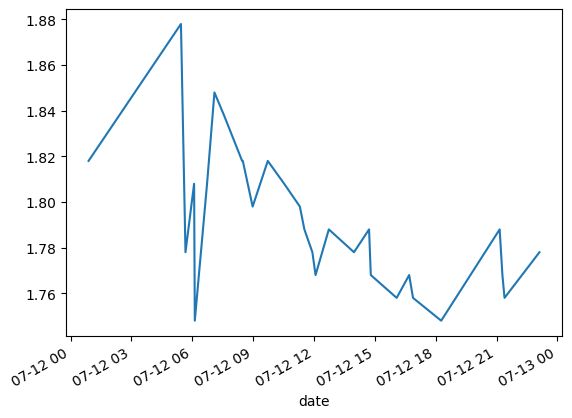

In [20]:
df[df.station_uuid == '28d2efc8-a5e6-47d6-9d37-230fbcefcf70']['e5'].plot()